### Survey analysis from
Content Survey Results and Survey Questions for both the 2017 and 2018 Python Developers Survey
- https://www.jetbrains.com/research/python-developers-survey-2017/
- https://www.jetbrains.com/research/python-developers-survey-2018/

In [37]:
# import libs
import os
import warnings
warnings.filterwarnings('ignore')

# go to dir
os.chdir('D:\\data-science\\python-developers-survey-2018')
print(os.listdir("."))

['.ipynb_checkpoints', 'foo.pdf', 'input', 'multipage_pdf.pdf', 'output.pdf', 'Python Developer Survey 2018 external sharing', 'Python Developers Survey 2017_ Raw Data Sharing', 'python-developers-survey-2018.zip', 'starter.py', 'Survey-EDA.ipynb', 'survey.csv', 'test-file.pdf']


In [38]:
# import libs
import pandas as pd
# open files
f2017 = 'Python Developers Survey 2017_ Raw Data Sharing/pythondevsurvey2017_raw_data.csv'
survey2017 = pd.read_csv(f2017)
#f2018 = 'Python Developer Survey 2018 external sharing/python_psf_external_18.csv'
#survey2018 = pd.read_csv(f2018,index_col=0)

In [39]:
survey2017.head()

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,...,Technical support:Which of the following best describes your job role(s)?,Data analyst:Which of the following best describes your job role(s)?,Business analyst:Which of the following best describes your job role(s)?,Team lead:Which of the following best describes your job role(s)?,Product manager:Which of the following best describes your job role(s)?,CIO / CEO / CTO:Which of the following best describes your job role(s)?,Systems analyst:Which of the following best describes your job role(s)?,Other - Write In::Which of the following best describes your job role(s)?,Could you tell us your age range?,What country do you live in?
0,Yes,NaN,NaN,JavaScript,NaN,PHP,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 or older,Italy
1,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Team lead,NaN,NaN,NaN,NaN,40-49,United Kingdom
2,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40-49,France
3,"No, I don’t use Python for my current projects",NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17 or younger,Spain
4,Yes,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-20,Israel


In [40]:
# remove some unnecessary strings `\n` = new line and `\xa0 = non-breaking space`
survey2017.columns = survey2017.columns.str.replace('\n', ' ').str.replace('\xa0', '')
#survey2018.columns = survey2018.columns.str.replace('\n', ' ').str.replace('\xa0', '')

In [41]:
# some columns have colons which indicates the answers are attached as prefix 
# to the column name, e.g.
# Educational purposes:What do you use Python for?
# Other - Write In::What do you use Python for?
def unique_columns(colList):
   ucols = []
   [ucols.append(i) for i in colList if not ucols.count(i)]
   return ucols

In [42]:
# create a list of column names as first columns
survey2017_cols = [col.split(':')[-1] for col in survey2017.columns]

# create a list of unique column names
survey2017_ucols = unique_columns(survey2017_cols)

# create a list of sub-column names as second columns
survey2017_subcols = []
for col in survey2017_ucols:
    survey2017_subcols.append([subcol.split(':')[0] for subcol in survey2017.columns if col in subcol])

# create a tuple from unique and sub columns
tuples = list(zip(survey2017_ucols,survey2017_subcols))

### List of all unique questions

In [43]:
for uq in survey2017_ucols:
    print(survey2017_ucols.index(uq), '\t',uq)

0 	 Is Python the main language you use for your current projects?
1 	 What other language(s) do you use?
2 	 What do you use Python for?
3 	 What do you use Python for the most?
4 	 Which version of Python do you use the most?
5 	 What do you typically use to upgrade your Python version?
6 	 What framework(s) do you use in addition to Python?
7 	 What additional technology(s) do you use in addition to Python?
8 	 What cloud platform(s) do you use?
9 	 What editor(s)/IDE(s) have you considered for use in your Python development?
10 	 What is the main editor you use for your current Python development?
11 	 When developing in Python, how often do you…?
12 	 Do youregularly work on multiple projects at the same time?
13 	 How did you first learn about your main editor?
14 	 How often do you use your main editor?
15 	 Are you missing any features in your main editor?
16 	 How likely is it that you would recommend your main editor to a friend or colleague?
17 	 Please think about the total

### Helper functions

In [44]:
# import libs
%matplotlib notebook
import matplotlib.pyplot as plt
from textwrap import wrap
import numpy as np

plt.rcParams['figure.figsize'] = (9,5)

# plotting single horizantal bar columns for questions except [11,17,21,22,26]
def plotBarChart(title,labels,counts):
    f = plt.figure()
    ax = f.add_subplot(111)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.set_title("\n".join(wrap(title, 80)), fontsize=12)
    y_pos = np.arange(len(labels))
    plt.barh(y_pos, counts, align='center', alpha=0.5)
    plt.yticks(y_pos, labels)
    #plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')
    plt.xlabel('percentage (%)')
    plt.tight_layout()
    plt.show()

# plotting horizantal stack bar columns for questions 11 and 17
def plotStackChart(title,labels,datas):
    f = plt.figure()
    ax = f.add_subplot(111)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.set_title("\n".join(wrap(title, 80)), fontsize=12)
    y_pos = np.arange(len(labels))
    left = np.zeros(shape=len(datas[0]))
    colors = ['#b5ffb9', '#f9bc86', '#a3acff']
    for data, color in zip(datas, colors):
        legend = valueLegends[datas.index(data)]
        ax.barh(y_pos, data, color=color, left=left, edgecolor='w', label=legend)
        left += np.array(data)
    plt.yticks(y_pos, valueLabels)
    plt.xlabel('percentage (%)')
    plt.legend(loc='upper left', fancybox=True, framealpha=0.3)
    plt.tight_layout()
    plt.show()

# plotting pie chart for questions except [11,17,21,22,26]
def plotPieChart(title,labels,counts):
    explode=[] ; r=0.
    for v in counts: 
        if v > 0.25: explode.append(0.)
        else: r+=0.15 ; explode.append(round(r,2))    
    f=plt.figure()
    ax=f.add_subplot(111)
    ax.set_title("\n".join(wrap(title, 80)), fontsize=12)
    ax.pie(counts, labels=labels, explode=explode, autopct='%1.1f%%')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()
    
# import required libs for plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# function help to plot world map related to Q26
def plotWorldMap(title, labels, counts, iso):
    data = [ dict( type='choropleth', colorscale = 'Reds', autocolorscale = False, reversescale = False, 
                   locations = iso, z = counts, text = labels,
                   marker = dict( line = dict ( color = 'rgb(255, 255, 255)', width = 0.5) ),
                   colorbar = dict(len=0.6, tickprefix='%', title = 'percentage (%)') ) ]
    layout = dict( title = title, 
                   margin = dict (l=0, r=0, t=30, b=0),
                   width = 900, height = 900,
                   geo = dict( scope='world', projection=dict( type='mercator' ),
                               showframe = False, showcoastlines = False, 
                               showlakes = True, lakecolor = 'rgb(255, 255, 255)') )
    fig = dict( data=data, layout=layout )
    iplot(fig)

# import required libs for pycountry
import pycountry
# function help to find alpha-3 (iso3) chars for the given country name
def get_country_code(name):
    for country in list(pycountry.countries):
        if name in country.name:
            return country.alpha_3
    return None

### Loop over all unique and sub columns

<IPython.core.display.Javascript object>


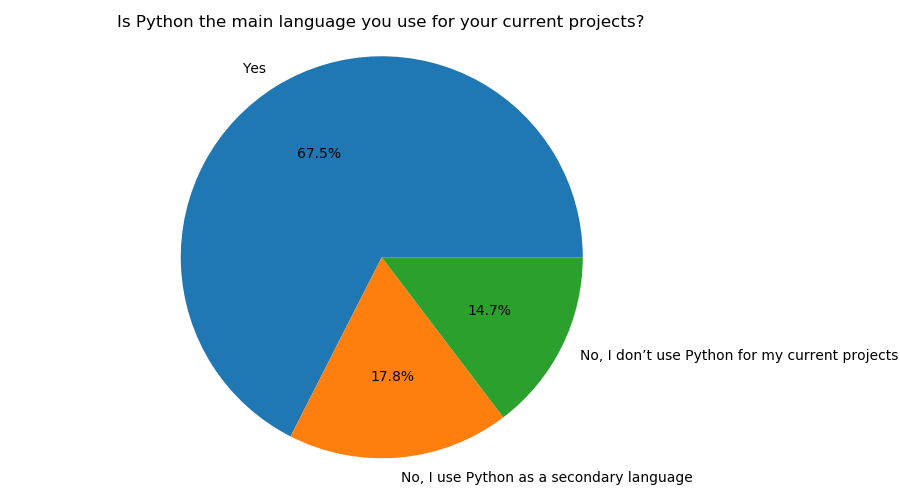

<IPython.core.display.Javascript object>


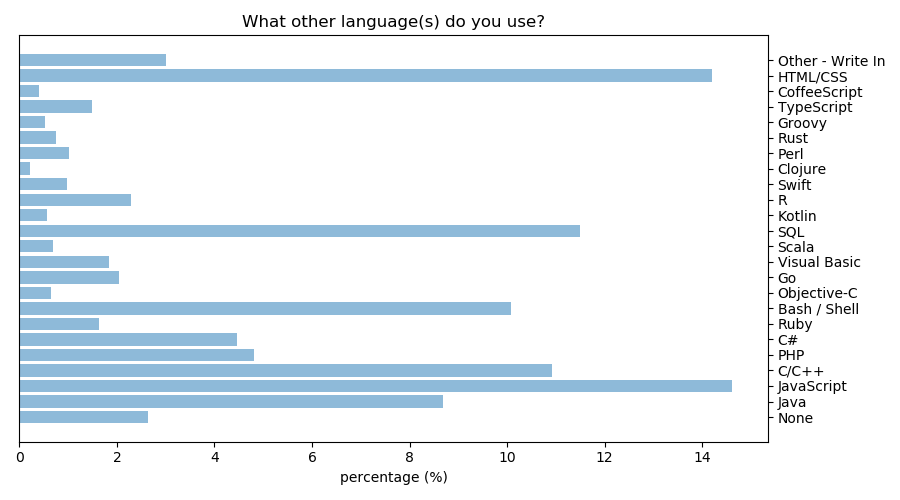

<IPython.core.display.Javascript object>


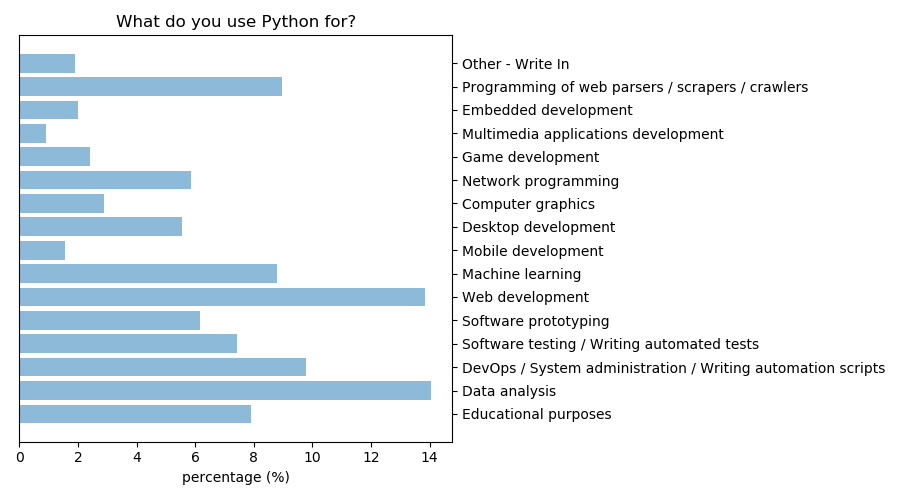

<IPython.core.display.Javascript object>


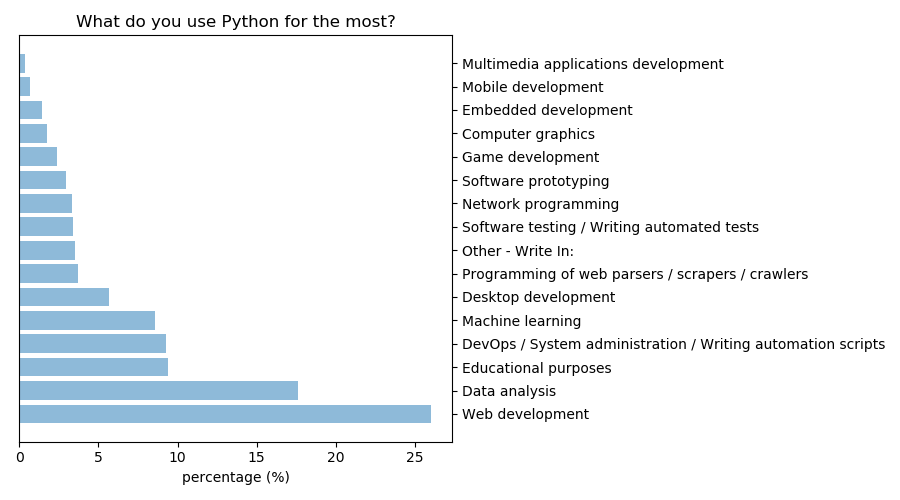

<IPython.core.display.Javascript object>


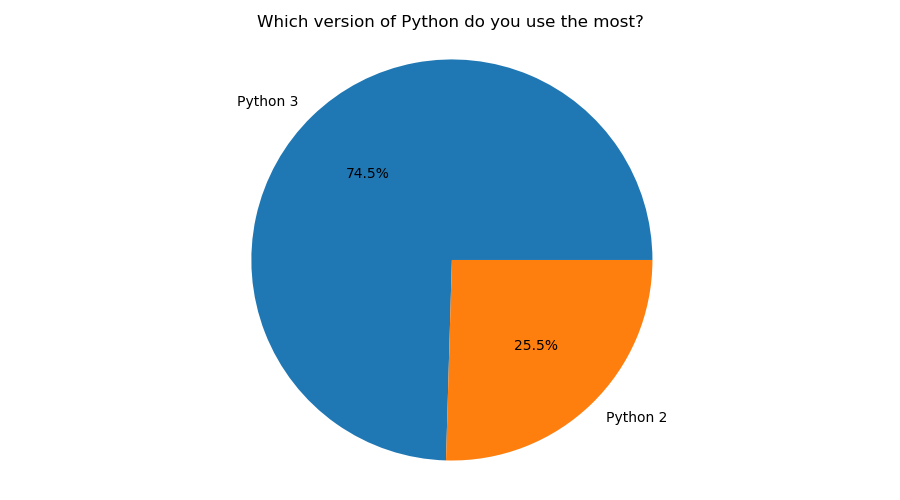

<IPython.core.display.Javascript object>


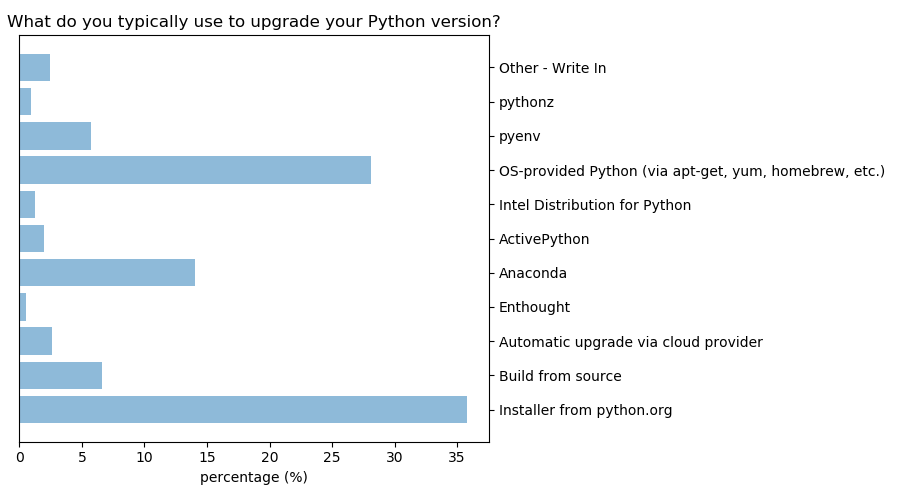

<IPython.core.display.Javascript object>


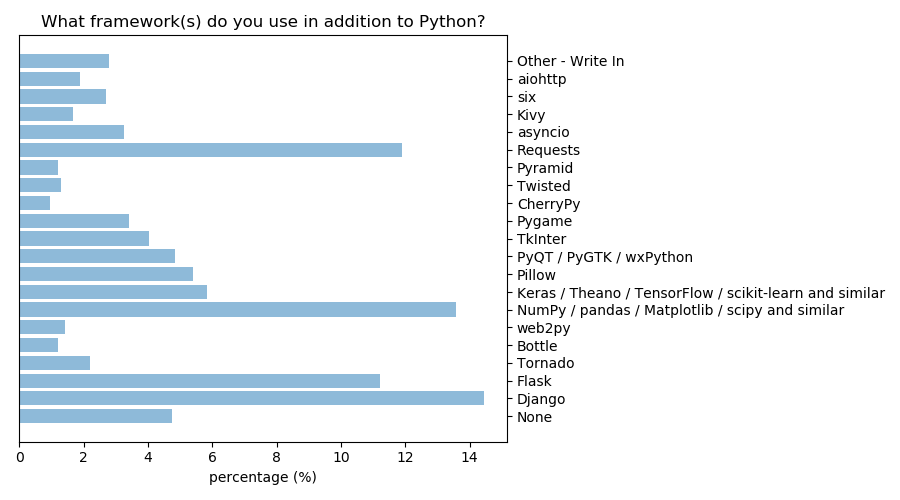

<IPython.core.display.Javascript object>


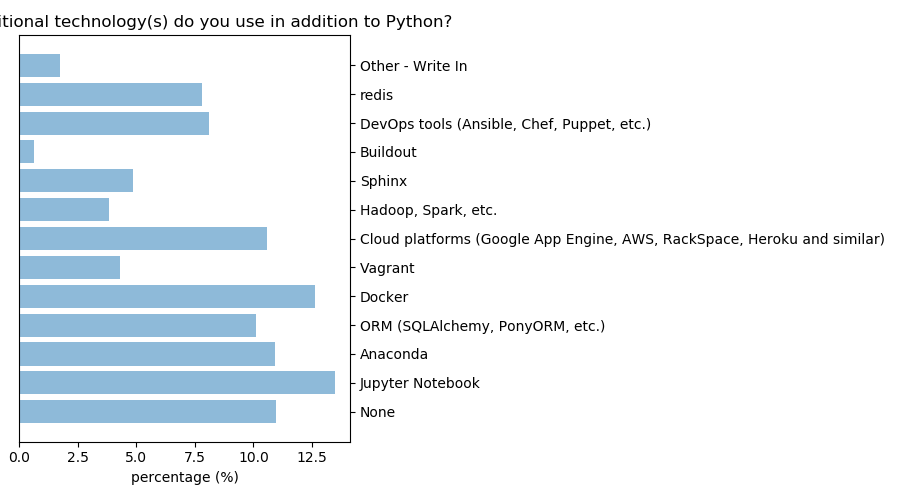

<IPython.core.display.Javascript object>


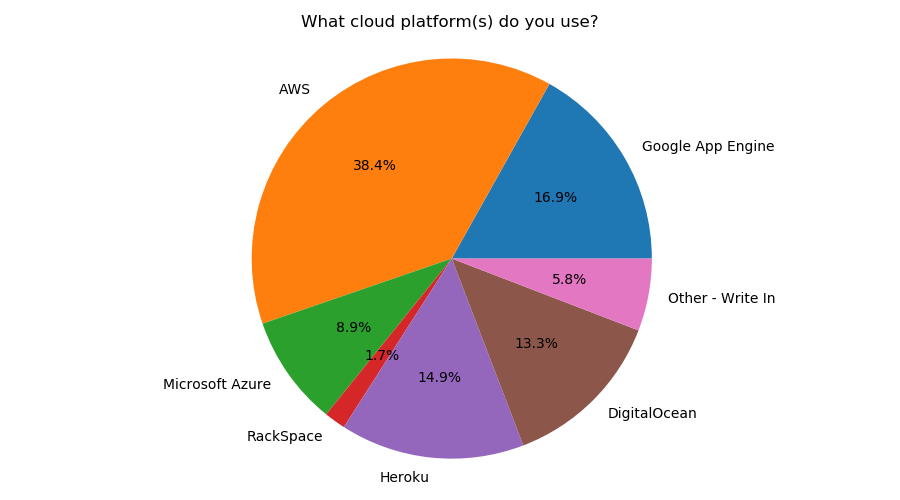

<IPython.core.display.Javascript object>


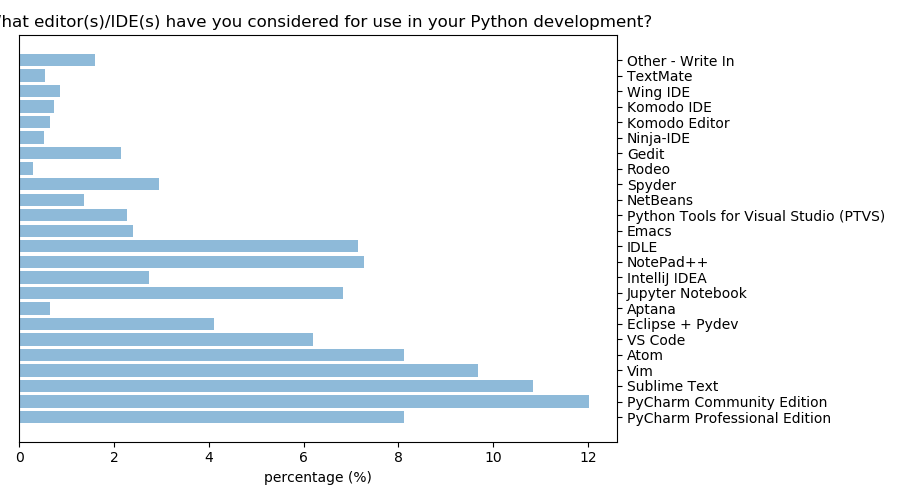

<IPython.core.display.Javascript object>


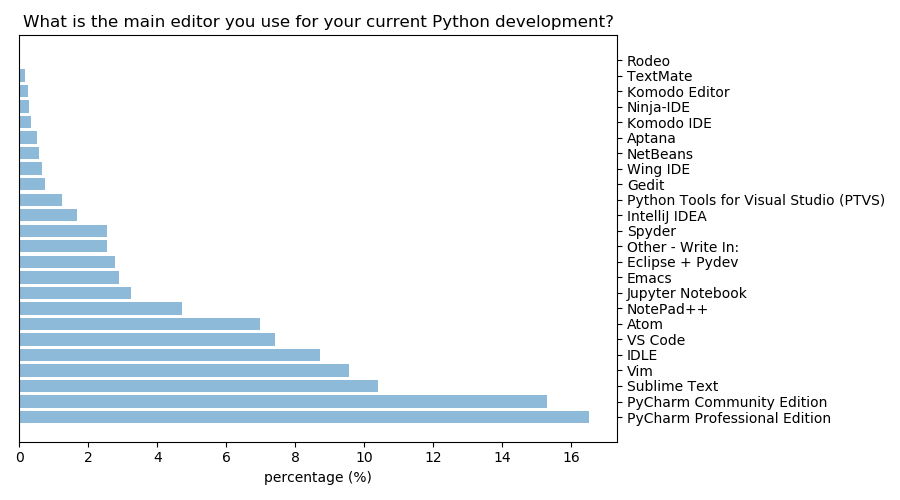

<IPython.core.display.Javascript object>


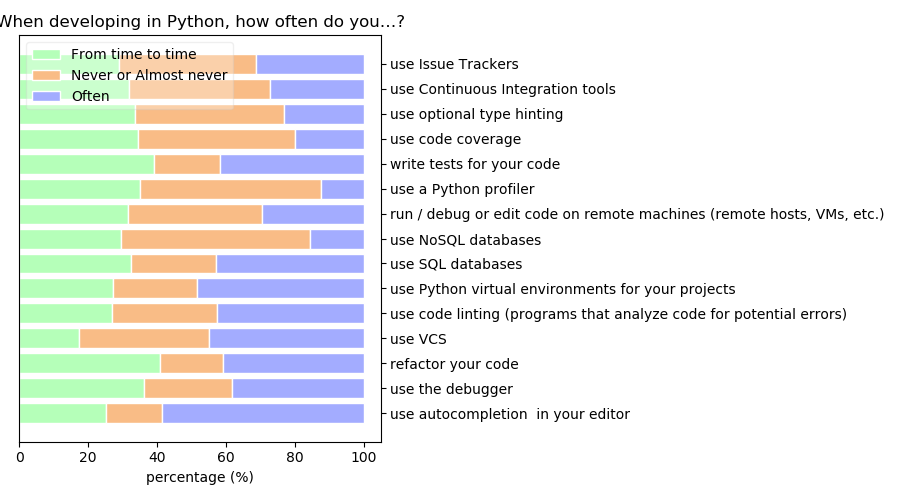

<IPython.core.display.Javascript object>


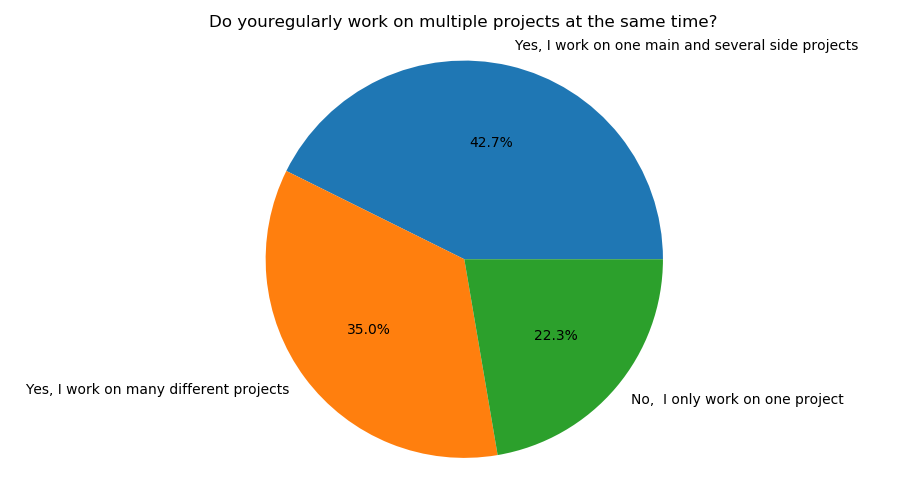

<IPython.core.display.Javascript object>


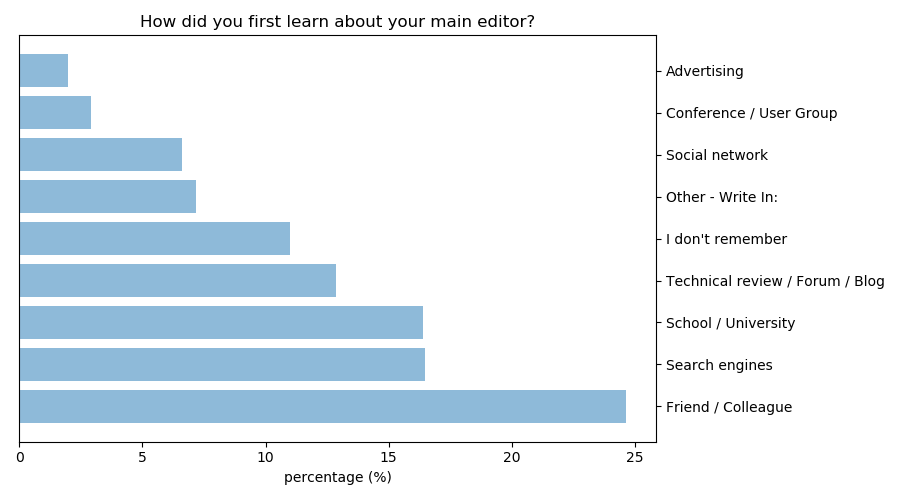

<IPython.core.display.Javascript object>


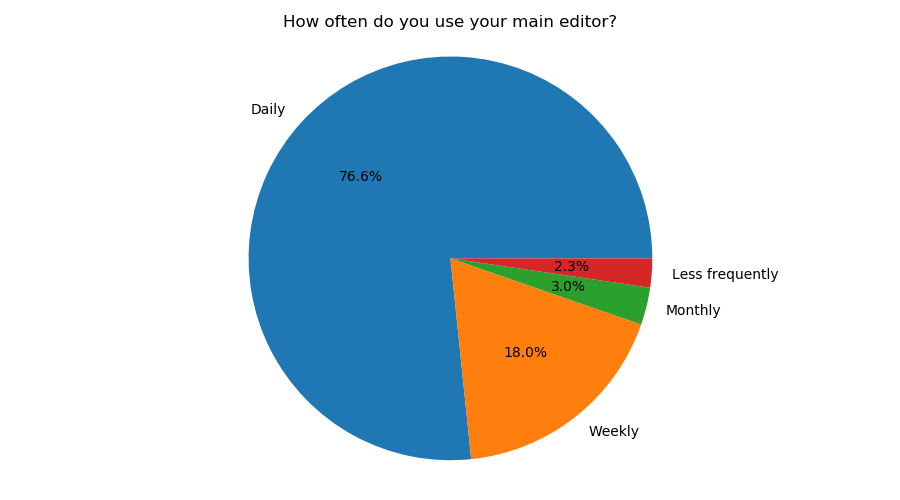

<IPython.core.display.Javascript object>


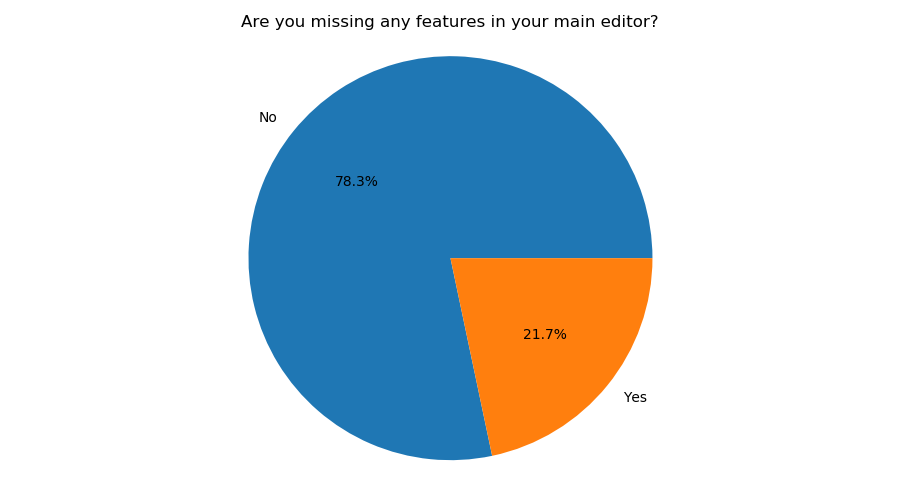

<IPython.core.display.Javascript object>


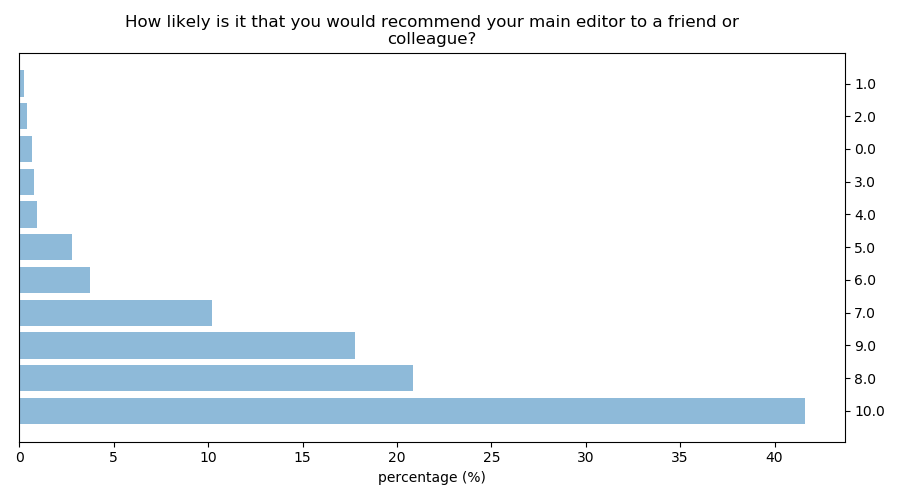

<IPython.core.display.Javascript object>


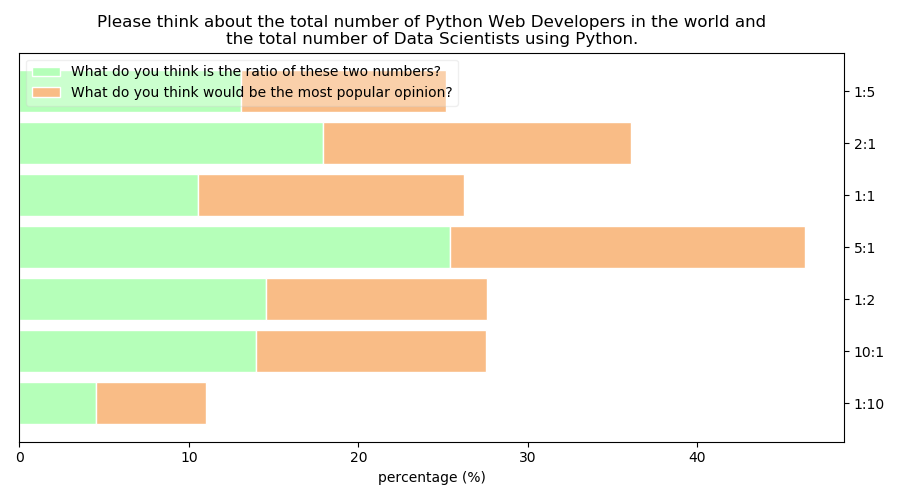

<IPython.core.display.Javascript object>


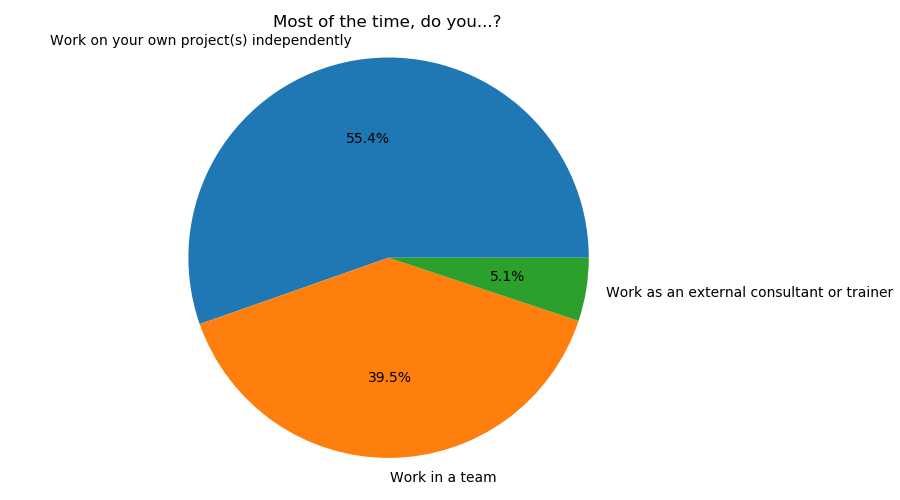

<IPython.core.display.Javascript object>


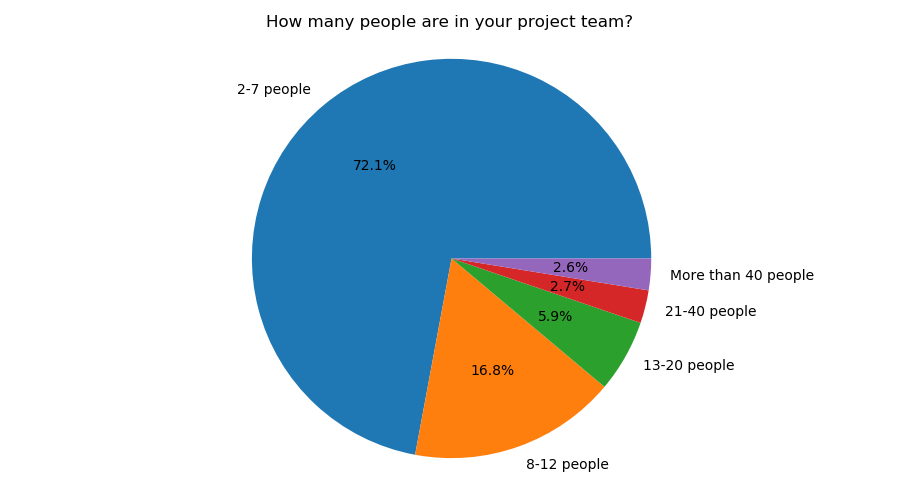

<IPython.core.display.Javascript object>


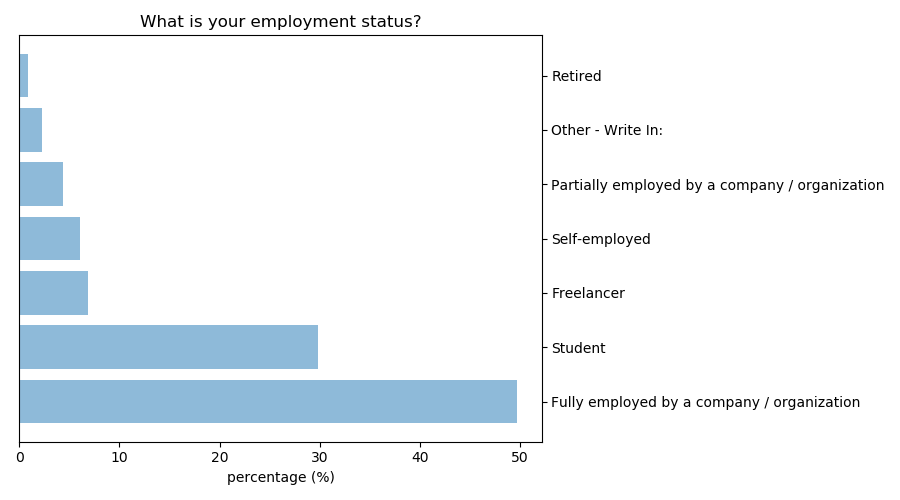

<IPython.core.display.Javascript object>


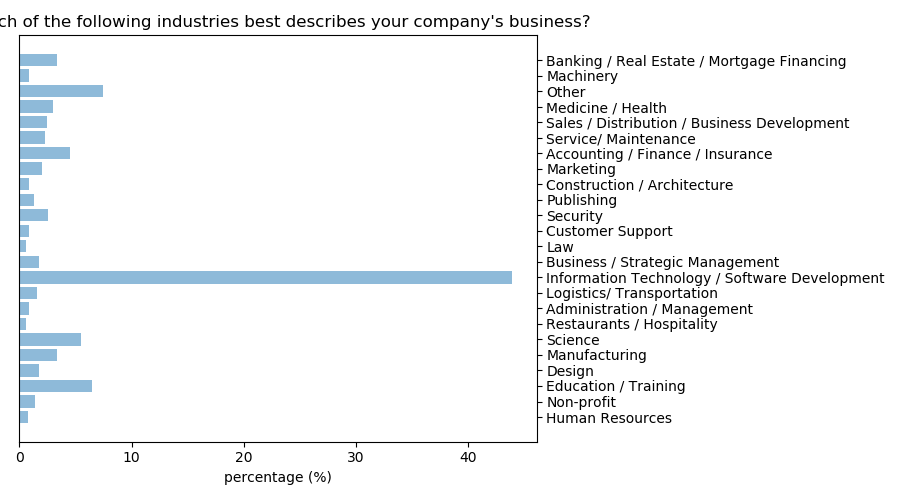

<IPython.core.display.Javascript object>


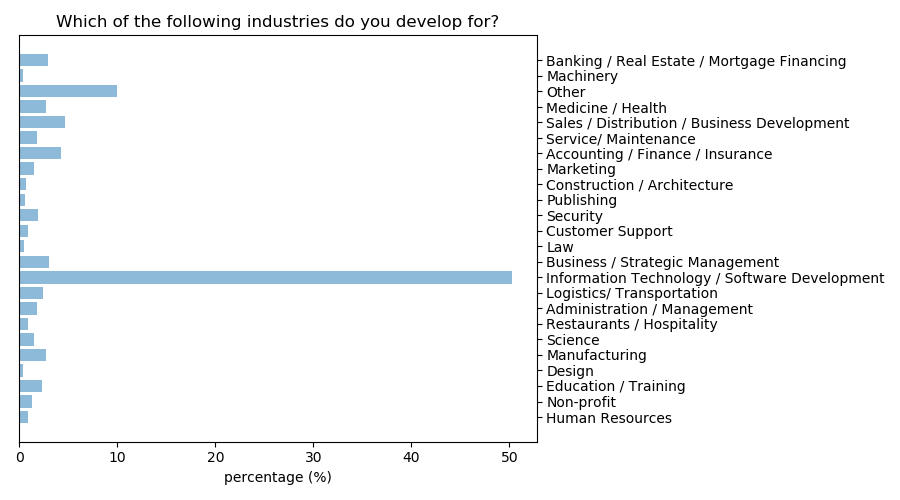

<IPython.core.display.Javascript object>


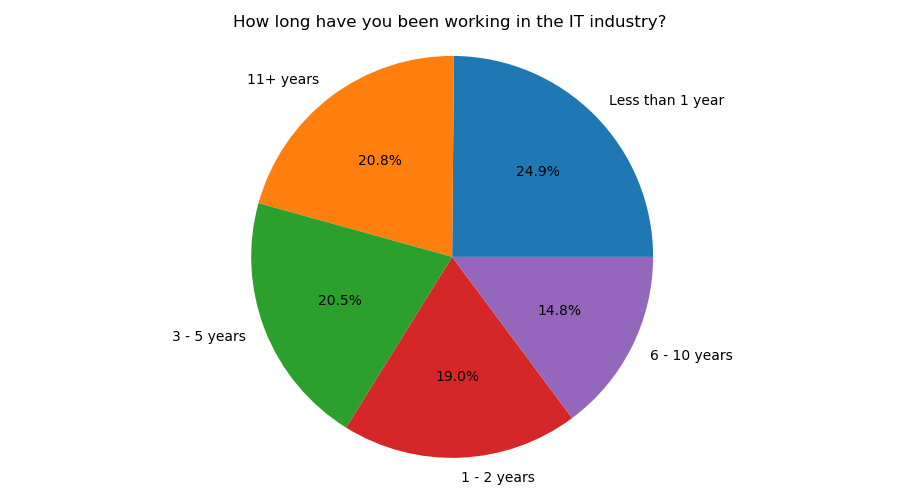

<IPython.core.display.Javascript object>


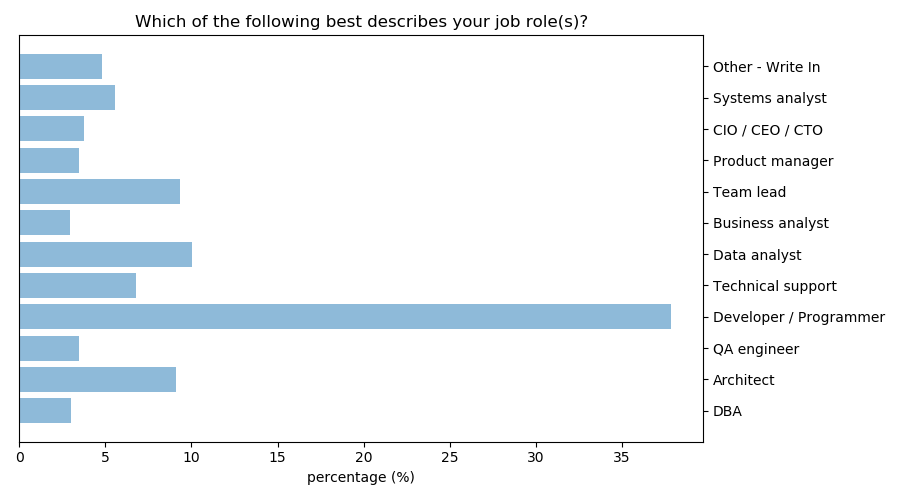

<IPython.core.display.Javascript object>


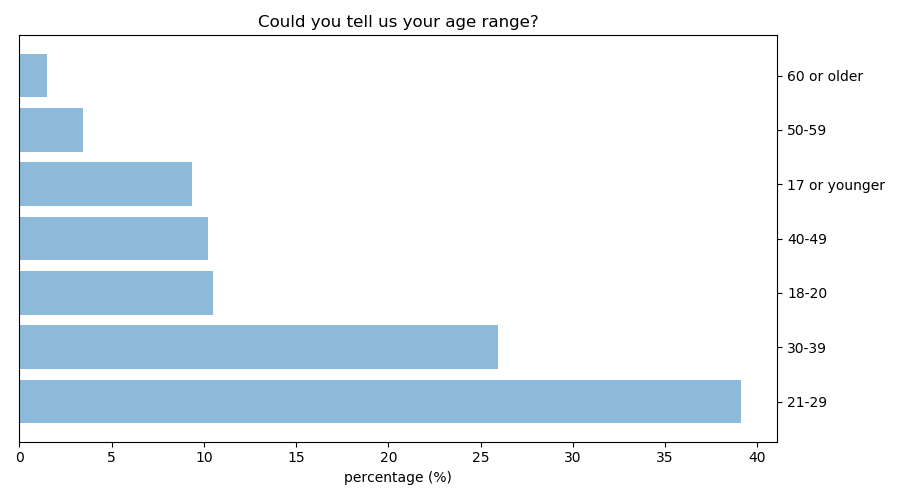

In [45]:
# loop over tuples containing first and second columns
for t in tuples:
    #print('Question\t', tuples.index(t), '\n')
    #-------------------------------------------------------------------------
    # Question 11 contains multiple selections
    #-------------------------------------------------------------------------
    if tuples.index(t)==11:
        title = tuples[11][0]
        colNames = survey2017.filter(like=title).columns.tolist()
        valueLegends = survey2017[colNames[0]].value_counts(sort=False).keys().tolist()
        valueLabels = []; data1 = []; data2 = []; data3 = []
        for col in colNames:
            valueLabels.append(col.split(':')[0])
            valueCounts = survey2017[col].value_counts(normalize=True,sort=False).tolist()
            valueCounts = [100*v for v in valueCounts]
            data1.append(valueCounts[0])
            data2.append(valueCounts[1])
            data3.append(valueCounts[2])
        datas = [data1, data2, data3]
        plotStackChart(title,valueLabels,datas) 
    #-------------------------------------------------------------------------
    # Question 17 contains two sub-questions
    #-------------------------------------------------------------------------
    elif tuples.index(t)==17:
        title = tuples[17][0]
        colNames = survey2017.filter(like=title).columns.tolist()
        valueLegends = []; datas=[]
        for col in colNames:
            valueLegends.append(col.split(':')[0])
            valueCounts = survey2017[col].value_counts(normalize=True,sort=False).tolist()
            valueCounts = [100*v for v in valueCounts]
            valueLabels = survey2017[col].value_counts(sort=False).keys().tolist()
            datas.append(valueCounts)
        plotStackChart(title,valueLabels,datas) 
    #-------------------------------------------------------------------------
    # Question 21 contains multiple selection from the given list
    #-------------------------------------------------------------------------
    elif tuples.index(t)==21:
        title = tuples[21][0]
        colName = survey2017.filter(like=title).columns
        valueCounts = survey2017[colName[0]].value_counts(normalize=True,sort=False).tolist()
        valueCounts = [100*v for v in valueCounts]
        valueLabels = survey2017[colName[0]].value_counts(sort=False).keys().tolist()
        plotBarChart(t[0],valueLabels,valueCounts)
    #-------------------------------------------------------------------------
    # Question 22 contains multiple selection from the given list
    #-------------------------------------------------------------------------
    elif tuples.index(t)==22:
        title = tuples[22][0]
        colName = survey2017.filter(like=title).columns
        valueCounts = survey2017[colName[0]].value_counts(normalize=True,sort=False).tolist()
        valueCounts = [100*v for v in valueCounts]
        valueLabels = survey2017[colName[0]].value_counts(sort=False).keys().tolist()
        plotBarChart(t[0],valueLabels,valueCounts)
    elif tuples.index(t)==26:
    #-------------------------------------------------------------------------
    # Question 26 contains list of countries, value_counts to Series & DataFrame afterwards
    #-------------------------------------------------------------------------        
        title = tuples[26][0]
        vals = survey2017[title].value_counts(normalize=True,sort=False)
        df = pd.DataFrame(vals)
        df = df.reset_index()
        df.columns = ['Country', 'Counts']
        df['ISO3'] = [get_country_code(country) for country in df.Country]
        plotWorldMap(title, df.Country, df.Counts, df.ISO3)
    else:
    #-------------------------------------------------------------------------
    # All othe questions except [11,17,21,22,26] has/has not colon ":" in its name
    #-------------------------------------------------------------------------        
        if t[0] == t[1][0]:
            valueLabels = survey2017[t[1][0]].value_counts().keys().tolist()
            valueCounts = survey2017[t[1][0]].value_counts(normalize=True).tolist()
            valueCounts = [100*v for v in valueCounts]
            # valueLabels are small amount then plot PieChart, else BarChart
            if len(valueLabels)<=5: plotPieChart(t[0],valueLabels,valueCounts)
            else: plotBarChart(t[0],valueLabels,valueCounts)
        else:
            valueLabels = [col.split(':')[0] for col in survey2017.columns if t[0] in col]
            valueCounts = [survey2017[col].count() for col in survey2017.columns if t[0] in col]
            sum_valueCounts = sum(valueCounts)
            valueCounts = [100*vc/sum_valueCounts for vc in valueCounts]
            # valueLabels are small amount (7) then plot PieChart, else BarChart
            if len(valueLabels)<=7: plotPieChart(t[0],valueLabels,valueCounts)
            else: plotBarChart(t[0],valueLabels,valueCounts)
    